# Introduction to Machine Learning with Python

## Part 1 - Handwritten Digit Recognition

### Definition

"How do we create computer programs that improve with experience?"

Examples:
- Spam detection
- Credit card fraud detection
- Recommendation system

### Supervised vs. Unsupervised
- Supervised machine learning: The program is “trained” on a pre-defined set of “training examples”, which then facilitate its ability to reach an accurate conclusion when given new data. We are learning a model from labeled data.
<img src="supervised.png">
<img src="supervised_boundary.png">
- Unsupervised machine learning: The program is given a bunch of data and must find patterns and relationships therein. We are learning a model from unlabeled data.
<img src="unsupervised.png">
<img src="unsupervised_cluster.png">

### Supervised Machine Learning
We have some function f(x) and learning consists of using various mathematical algorithms to optimize this function so that given inout data x, we can predict an output f(x).

In practice, x will almost always represent multiple data points.

Within supervised ML we usually either have a **classification** problem or a **regression** problem.
<img src="classification.png">
<img src="regression.png">

### Training, Testing & Evaluation
In order to optimize our predictor function, we need **training examples**. We will then want to check the accuracy of our model and so we do that against **test examples**.
<img src="evaluation.png">

### K-Nearest Neighbors (KNN)
Main idea: Use similarity between examples and output a class membership. An object is classified by a majority vote of its neighbors. K is typically a small integer indicating how many neighbors are to be considered
<img src="KnnClassification.svg">
In this example, the green circle should be classified either to the class of blue squares or the red triangles.
- If k=3 (solid line circle), it is assigned to the red triangle class (2v1)
- If k=5 (dotted line circle), it is assigned to the blue square class (3v2)

Let's see this in practice with a dataset of handwritten digits:

In [3]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that is used in many of the below examples

In [6]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape: ', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape:  (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python useful info:

- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)



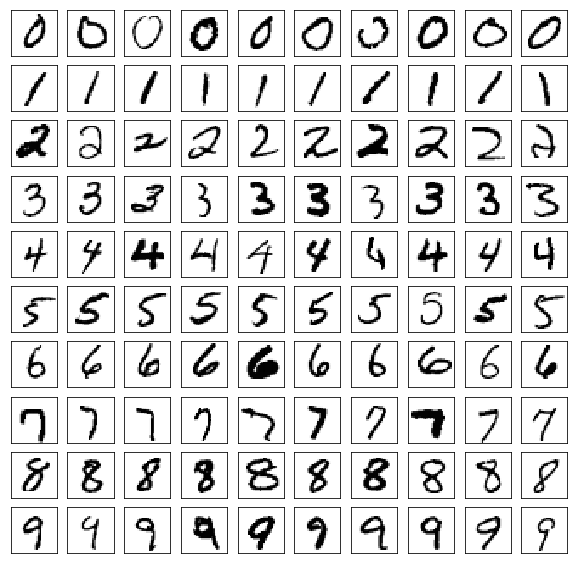

In [7]:
def P1(num_examples=10):

    # Createa 10x10 figure to display the results
    plt.figure(figsize=(num_examples, num_examples))
    labels = np.unique(mini_train_labels)
    subplot = 1
    for i in labels:
        for j in np.where(mini_train_labels == i)[0][:10]:
            plt.subplot(len(labels), num_examples, subplot)
            # Reshape the array into a matrix for rendering
            matrix = np.reshape(mini_train_data[j], (28, 28))
            # Render the matrix in greys
            plt.imshow(matrix, cmap='Greys')
            # Remove the x and y scales
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            subplot += 1

P1(10)

2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set, showing precision, recall, and F1 for each label

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results


In [8]:
def P2(k_values):

    for k in k_values:
        # Create KN models based on the different k values
        knn_P2 = KNeighborsClassifier(k)
        # Fit the model to the mini training set
        knn_P2.fit(mini_train_data, mini_train_labels)
        # Run prediction on the dev data
        predicted_P2 = knn_P2.predict(dev_data)
        expected_P2 = dev_labels
        print("Classification report for classifier %s:\n%s\n"
              % (knn_P2, classification_report(expected_P2, predicted_P2)))    

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

        0.0       0.93      0.97      0.95        91
        1.0       0.90      0.98      0.94       133
        2.0       0.94      0.91      0.93       111
        3.0       0.85      0.90      0.88        98
        4.0       0.92      0.87      0.89       107
        5.0       0.83      0.76      0.79        78
        6.0       0.94      0.93      0.94       101
        7.0       0.91      0.92      0.91        98
        8.0       0.93      0.79      0.86        97
        9.0       0.75      0.83      0.78        86

avg / total       0.89      0.89      0.89      1000


Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neigh

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value that can be used for timing operations



In [9]:
def P3(train_sizes, accuracies):

    times = []
    for size in train_sizes:
        # Run KNN(n=1) models for different training data sizes from train_sizes
        knn_P3 = KNeighborsClassifier(1)
        train_data_P3, train_labels_P3 = X[:size], Y[:size]
        knn_P3.fit(train_data_P3, train_labels_P3)
        # Get a timestamp after fitting the data and before doing the prediction
        pre_time = time.time()
        knn_P3.predict(dev_data)
        # Get a timestamp after the prediction
        post_time = time.time()
        total_time = post_time - pre_time
        # Calculate accuracy and append to accuracies list along with time to times list
        accuracy = knn_P3.score(dev_data, dev_labels)
        accuracies.append(accuracy)
        times.append(total_time)
    
    # After looping through all the models, print the training size list, the accuracy list, and the times list.
    fmt = '{:<8}{:<15}{:<10}{}'

    print(fmt.format('', 'Training Size', 'Accuracy', 'Time (s)'))
    for i, (size, accuracy, t) in enumerate(zip(train_sizes, accuracies, times)):
        print(fmt.format(i, size, accuracy, t))


train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

        Training Size  Accuracy  Time (s)
0       100            0.704     0.09348416328430176
1       200            0.791     0.18784785270690918
2       400            0.849     0.4044981002807617
3       800            0.87      0.8024899959564209
4       1600           0.902     1.774606704711914
5       3200           0.931     3.3106091022491455
6       6400           0.941     6.720635175704956
7       12800          0.954     12.636377811431885
8       25000          0.964     27.242819786071777


4) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix


[[ 88   0   1   0   0   1   1   0   0   0]
 [  0 131   1   1   0   0   0   0   0   0]
 [  1   2 101   2   0   1   0   2   2   0]
 [  1   1   1  88   0   3   1   0   2   1]
 [  0   1   0   0  93   0   0   1   0  12]
 [  2   2   1   7   0  59   1   0   1   5]
 [  2   2   0   0   1   1  94   0   1   0]
 [  1   2   0   0   1   0   0  90   0   4]
 [  0   4   1   3   2   5   3   0  77   2]
 [  0   1   1   2   4   1   0   6   0  71]]


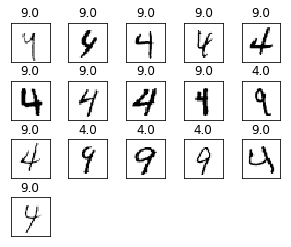

In [11]:
def P4():

    # Create a 1-NN model and fit it with the trainining data
    knn_P4 = KNeighborsClassifier(1)
    knn_P4.fit(mini_train_data, mini_train_labels)
    
    # Create a prediction from the dev data and output a confusion matrix
    predicted_P4 = knn_P4.predict(dev_data)
    cm_P4 = confusion_matrix(dev_labels, predicted_P4)
    
    print (cm_P4)
    
    # Let's print some results for 4s and 9s
    plt.figure(figsize=(5, 5))
    plt.subplots_adjust(hspace=0.5)
    k = 1
    for i in range(len(dev_labels)):
        if (dev_labels[i]==4 and predicted_P4[i] == 9) or (dev_labels[i]==9 and predicted_P4[i] == 4):
            plt.subplot(5, 5, k)
            # Reshape the array into a matrix for rendering
            matrix = np.reshape(X[60000+i], (28, 28))
            # Render the matrix in greys
            plt.imshow(matrix, cmap='Greys')
            # Remove the x and y scales
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            # Add as a title the actual prediction so we know
            plt.title(str(predicted_P4[i]))
            k += 1
    
P4()

(5) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:

- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

For blurred training data and regular development data, the score is: 0.916
For regular training data and blurred development data, the score is: 0.872
For blurred training data and blurred development data, the score is: 0.925


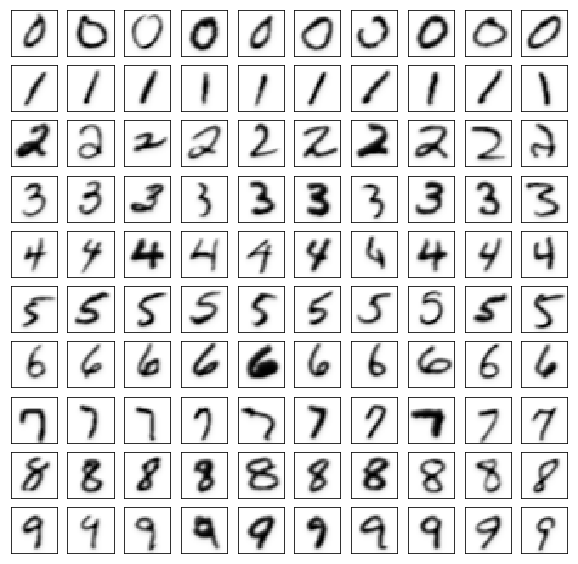

In [14]:
# This function will assume a 784 (28x28) digit
def GaussianBlur28(data):
    for k in range(len(data)):
        point = data[k]
        # We will create a new point so that we can modify the value and not the reference
        new_point = np.array(point)
        shaped_point = new_point.reshape(28, 28)
        for i in range(28):
            for j in range(28):                
                # We will use the calculations below to determine the coordinates of the neighboring pixels
                Ia = 0 if i-1<0 else i-1
                Ib = 28 if i+2>28 else i+2
                Ja = 0 if j-1<0 else j-1
                Jb = 28 if j+2>28 else j+2
                
                # Grab a 3x3 piece of the point in order to get the center
                piece = shaped_point[Ia:Ib, Ja:Jb]
                piece_size = len(piece) * len(piece[0])
                piece_sum = sum(map(sum, piece))
                
                # Set the new value for the pixel 
                shaped_point[i,j] = piece_sum/piece_size
        data[k] = shaped_point.ravel()

def P5():
    
    # Make new copies of the data so we can modify them freely
    blur_mini_train_data = [np.array(row) for row in mini_train_data]
    blur_dev_data = [np.array(row) for row in dev_data]
    
    # Blur procedure for mini_train_data and dev data
    GaussianBlur28(blur_mini_train_data)
    GaussianBlur28(blur_dev_data)

    # Create a 1-NN to use for the different combinations mentioned above
    knn_P5 = KNeighborsClassifier(1)    
    knn_P5.fit(blur_mini_train_data, mini_train_labels)
    score1 = knn_P5.score(dev_data, dev_labels)
    print ("For blurred training data and regular development data, the score is: %s" % score1)
    
    knn_P5 = KNeighborsClassifier(1)
    knn_P5.fit(mini_train_data, mini_train_labels)
    score2 = knn_P5.score(blur_dev_data, dev_labels)
    print ("For regular training data and blurred development data, the score is: %s" % score2)
    
    knn_P5 = KNeighborsClassifier(1)
    knn_P5.fit(blur_mini_train_data, mini_train_labels)
    score3 = knn_P5.score(blur_dev_data, dev_labels)
    print ("For blurred training data and blurred development data, the score is: %s" % score3)
    
    # Createa 10x10 figure to display some blurred results
    plt.figure(figsize=(10, 10))
    subplot = 1
    for i in range(10):
        for j in np.where(mini_train_labels == i)[0][:10]:
            plt.subplot(10, 10, subplot)
            # Reshape the array into a matrix for rendering
            matrix = np.reshape(blur_mini_train_data[j], (-1, 28))
            # Render the matrix in greys
            plt.imshow(matrix, cmap='Greys')
            # Remove the x and y scales
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            subplot += 1

P5()

### What next?

- Consider bias-variance tradeoff (dilemma) - simultaneously minimizing two sources of error that prevent supervised learning algorithms from generalizing beyond the training set.
<img src="biasvariance.png">
- In general, use simple models
    - Feature selection
    - Model selection
    - Regularization
    - Cross-validation
- Play around with different classifiers
    - sklearn.naive_bayes (e.g. GaussianNB)
    - sklearn.tree (e.g. DecisionTreeClassifier)
    - sklearn.svm (e.g. SVC)
    - sklearn.neural_network (e.g. MLPClassifier)
    - sklearn.ensemble (e.g. RandomForestClassifier)
    
Useful links:
- https://www.anaconda.com/
- http://scikit-learn.org/stable/index.html
- https://www.kaggle.com/